In [9]:
!cd yolov5

In [10]:
import torch
import matplotlib.pyplot as plt 
import numpy as np
import cv2

In [11]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /home/adityasanyal1996/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-7-31 Python-3.12.4 torch-2.4.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [12]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

### Making detections

In [13]:
img = 'https://assets.telegraphindia.com/telegraph/2023/Aug/1691905891_1668221447_kolkata-traffic-24.jpg'

In [14]:
results = model(img)
results.print()

/home/adityasanyal1996/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 506x900 8 persons, 7 cars, 2 motorcycles, 9 buss, 1 truck
Speed: 38.4ms pre-process, 284.9ms inference, 2.4ms NMS per image at shape (1, 3, 384, 640)


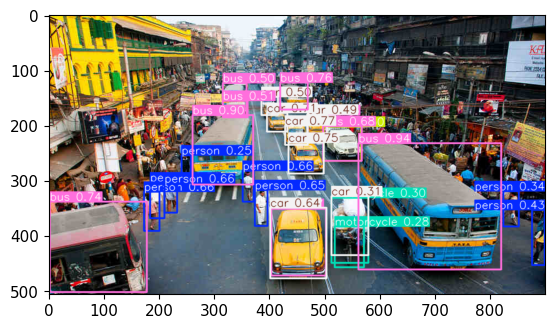

In [15]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

### Real-time Detections

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('YOLO', frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()